In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.float_format='{:20.2f}'.format
pd.set_option('display.max_columns',999)

In [3]:
df=pd.read_excel('online_retail_II.xlsx',sheet_name=0)

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


## Null values in CustomerID Section

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


## quantity and price should no be in minus 

In [8]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [9]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


## Inspecting Null Values

In [11]:
df[df['Customer ID'].isnull()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


## Negative Price value problem can be easily solved by removing Customerid as there is no customer id 

In [13]:
df[df['Price']<0].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


## Checking count of negative quantity 

In [15]:
df[df['Quantity']<0]['Quantity'].count()


12326

## Invoice that are starting with C are cancellled as described to dataset so will be removing that 

In [17]:
##Filter out the stock code that donot are in 6 digits format 
df['Invoice']=df['Invoice'].astype("str")
df[df['Invoice'].str.match("^\\d{6}$")==False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


## Check if c is the only character representing invoice or there is some thing else

In [19]:

df['Invoice'].str.replace('[0-9]','',regex=True).value_counts()

Invoice
     515252
C     10206
A         3
Name: count, dtype: int64

## Checking strings with letter A

In [21]:
df[df['Invoice'].str.startswith('A')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


## Evaluating Stockcode colum(which should be only five digits) as mentioned in dataset

In [23]:
df['StockCode'].value_counts()

StockCode
85123A    3516
22423     2221
85099B    2057
21212     1933
21232     1843
          ... 
90005B       1
90197C       1
90080        1
20904        1
21120        1
Name: count, Length: 4632, dtype: int64

In [24]:
##aplying regex to fiter out stockcode with only 5 digits
df['StockCode']=df['StockCode'].astype("str")
df[df['StockCode'].str.match("^\\d{5}$")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


## Finding out the diversity of Stockcode (stockcode with other than 5 digits)

In [26]:
df[df['StockCode'].str.match("^\\d{5}$")==False]['StockCode'].value_counts()

StockCode
85123A    3516
85099B    2057
82494L    1165
85099F    1074
85099C     992
          ... 
84874A       1
84898E       1
79023B       1
16243A       1
79151B       1
Name: count, Length: 1675, dtype: int64

In [27]:
df[df['StockCode']=='79323P']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
209,489460,79323P,PINK CHERRY LIGHTS,8,2009-12-01 10:46:00,6.75,16167.00,United Kingdom
939,489539,79323P,PINK CHERRY LIGHTS,24,2009-12-01 12:18:00,5.45,15061.00,United Kingdom
1761,C489588,79323P,PINK CHERRY LIGHTS,-2,2009-12-01 14:01:00,6.75,13711.00,United Kingdom
3128,489656,79323P,PINK CHERRY LIGHTS,48,2009-12-01 17:28:00,5.45,17428.00,United Kingdom
...,...,...,...,...,...,...,...,...
304298,C519040,79323P,PINK CHERRY LIGHTS,-24,2010-08-13 11:25:00,5.45,17428.00,United Kingdom
340902,522631,79323P,PINK CHERRY LIGHTS,24,2010-09-16 09:07:00,5.45,14156.00,EIRE
363400,C524560,79323P,PINK CHERRY LIGHTS,-3,2010-09-29 14:39:00,6.75,14825.00,United Kingdom
412944,C528877,79323P,PINK CHERRY LIGHTS,-2,2010-10-25 12:14:00,6.75,13267.00,United Kingdom


In [28]:
df[(df['StockCode'].str.match("^\\d{5}$")==False)& (df['StockCode'].str.match('^\\d{5}[a-zA-Z]+')==False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.00,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.00,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.00,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.00,Germany
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.00,United Kingdom
...,...,...,...,...,...,...,...,...
524776,538147,M,Manual,1,2010-12-09 16:11:00,15.00,13090.00,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [29]:
df[(df['StockCode'].str.match("^\\d{5}$")==False)& (df['StockCode'].str.match('^\\d{5}[a-zA-Z]+')==False)]['StockCode'].value_counts().head()

StockCode
POST    865
M       850
DOT     736
C2      138
D       100
Name: count, dtype: int64

In [30]:
df[df['StockCode'].str.contains("^DOT")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [31]:
df[df['StockCode'].str.contains("^POST")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.00,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.00,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.00,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.00,Germany
927,C489538,POST,POSTAGE,-1,2009-12-01 12:18:00,9.58,15796.00,United Kingdom
...,...,...,...,...,...,...,...,...
522916,537967,POST,POSTAGE,1,2010-12-09 11:31:00,18.00,12494.00,France
522930,537995,POST,POSTAGE,2,2010-12-09 11:39:00,18.00,12712.00,Germany
522974,538003,POST,POSTAGE,8,2010-12-09 12:05:00,18.00,12429.00,Denmark
523064,538008,POST,POSTAGE,5,2010-12-09 12:17:00,18.00,12683.00,France


In [32]:
df[df['StockCode'].str.contains("^PADS")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.00,16705.00,United Kingdom
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.00,13583.00,United Kingdom
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.00,17350.00,United Kingdom
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.00,13408.00,United Kingdom
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47:00,0.00,13408.00,United Kingdom
97716,498562,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-21 12:03:00,0.00,15182.00,United Kingdom
101718,499056,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-24 13:46:00,0.00,13765.00,United Kingdom
104480,499399,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-26 13:26:00,0.00,14459.00,United Kingdom
123947,501176,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-03-15 11:00:00,0.00,14857.00,United Kingdom
156809,504332,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-04-12 16:30:00,0.00,12671.00,Germany


## DataCleaning

In [34]:
cleaned_df=df.copy()

In [35]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


## Removing invoices that dont have 6 digits

In [37]:
cleaned_df['Invoice']=cleaned_df['Invoice'].astype("str")
mask=(
      cleaned_df['Invoice'].str.match("^\\d{6}")==True
)
cleaned_df=cleaned_df[mask]

In [38]:
##checking 
cleaned_df[cleaned_df['Invoice'].str.match('^\\d{6}$')==False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


## Cleaning Stock Code

## Keeping stockcode containing 5 digits and 5digits followed by characters and the code with pads

In [41]:
cleaned_df['StockCode']=cleaned_df['StockCode'].astype("str")
mask=(
    cleaned_df['StockCode'].str.match('^\\d{5}$') | cleaned_df['StockCode'].str.match('^\\d{5}[a-zA-Z]+$') | cleaned_df['StockCode'].str.match('^PADS$')
)
cleaned_df=cleaned_df[mask]

## Verifying as we only want to keep pads other than 5 digits and 5digits plus letters and pads

In [43]:
cleaned_df[(df['StockCode'].str.match("^\\d{5}$")==False)& (cleaned_df['StockCode'].str.match('^\\d{5}[a-zA-Z]+')==False) & (cleaned_df['StockCode'].str.match('^PADS$')==False)]['StockCode'].value_counts()

C:\Users\hamid\AppData\Local\Temp\ipykernel_6948\2466335982.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_df[(df['StockCode'].str.match("^\\d{5}$")==False)& (cleaned_df['StockCode'].str.match('^\\d{5}[a-zA-Z]+')==False) & (cleaned_df['StockCode'].str.match('^PADS$')==False)]['StockCode'].value_counts()


Series([], Name: count, dtype: int64)

In [44]:
cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [45]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,512796.00,512796,512796.00,406337.00
mean,11.00,2010-06-28 18:26:52.709732352,3.39,15373.63
min,-9600.00,2009-12-01 07:45:00,0.00,12346.00
25%,1.00,2010-03-21 13:27:00,1.25,14004.00
50%,3.00,2010-07-06 14:25:00,2.10,15326.00
75%,10.00,2010-10-15 14:50:00,4.21,16814.00
max,19152.00,2010-12-09 20:01:00,1157.15,18287.00
std,104.35,NaN,5.07,1677.37


##Notice that All the negative quantity are associated with null customerid so by droping customer it will be solved

In [47]:
cleaned_df[cleaned_df['Quantity']<0]['Quantity'].count()

2102

In [48]:
cleaned_df[(cleaned_df['Customer ID'].isnull())&(cleaned_df['Quantity']<0)]['Quantity'].count()

2102

## Dropping null customers

In [50]:
cleaned_df.dropna(subset=['Customer ID'],inplace=True)

In [51]:
cleaned_df[cleaned_df['Customer ID'].isnull()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


## the negative quantity got removed by deleteing null customers

In [53]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.00,406337,406337.00,406337.00
mean,13.62,2010-07-01 10:11:06.543288320,2.99,15373.63
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14004.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.37


## Prices should not be zero 

In [55]:
cleaned_df[cleaned_df['Price']==0]['Price'].count()

28

## Removing price with 0 

In [57]:
cleaned_df=cleaned_df[cleaned_df['Price']!=0]

In [58]:
cleaned_df.shape

(406309, 8)

## The no of data drop  from orignal data in the process of cleaning

In [60]:
droprecords=df.shape[0]-cleaned_df.shape[0]
print(droprecords)

119152


## Featuring Engennering 

## making a column of total sale like if quantity=3 and price=500 so 500*3

In [63]:
cleaned_df['total_sales_line']=cleaned_df['Quantity']*cleaned_df['Price']
cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,total_sales_line
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00


## BHT SARI INVOICE DATA MA SAME H MEANS AIK KI TIME PA CHEEZAIN PURCHASE KRI H  EACH ROW REPRESENT DIFF PRODUCT YA MERA CODE CUSTOMER KA THROUGH GROUP BY LAGATA H AND THEN  .AGG SA NAYE COLUMNS BANATA H


In [65]:
aggregated_df=cleaned_df.groupby(by='Customer ID',as_index=False ).agg(
        Monetoryvalue=('total_sales_line','sum'),
        Frequency=('Invoice','nunique'),
        lastinvoicedate=('InvoiceDate','max')
)


In [66]:
aggregated_df

,Customer ID,Monetoryvalue,Frequency,lastinvoicedate
0,12346.00,169.36,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,2221.14,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00
...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00
4281,18284.00,411.68,1,2010-10-04 11:33:00
4282,18285.00,377.00,1,2010-02-17 10:24:00
4283,18286.00,1246.43,2,2010-08-20 11:57:00


## Breif visualization before formin clusters of same type of group

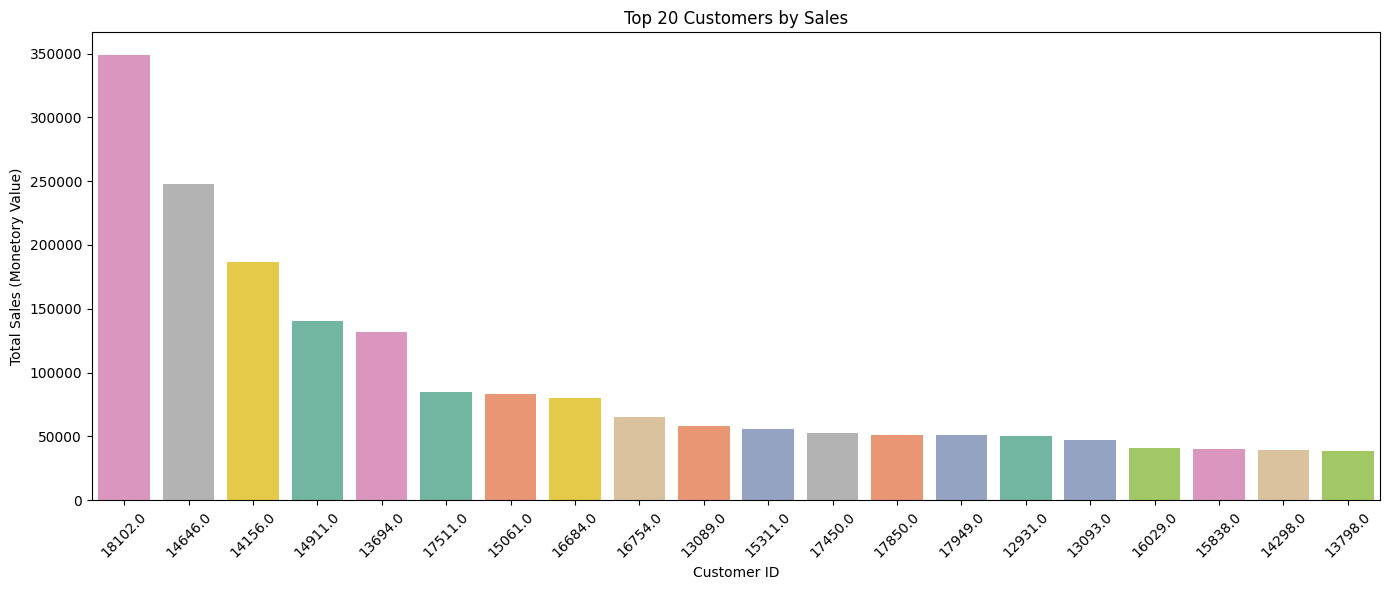

In [68]:
top20 = aggregated_df.sort_values(by='Monetoryvalue', ascending=False).head(20)
customer_order = top20['Customer ID']

plt.figure(figsize=(14, 6))
sns.barplot(data=top20, x='Customer ID', y='Monetoryvalue', hue='Customer ID',palette='Set2',legend=False,order=customer_order)

plt.xlabel('Customer ID')
plt.ylabel('Total Sales (Monetory Value)')
plt.title('Top 20 Customers by Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

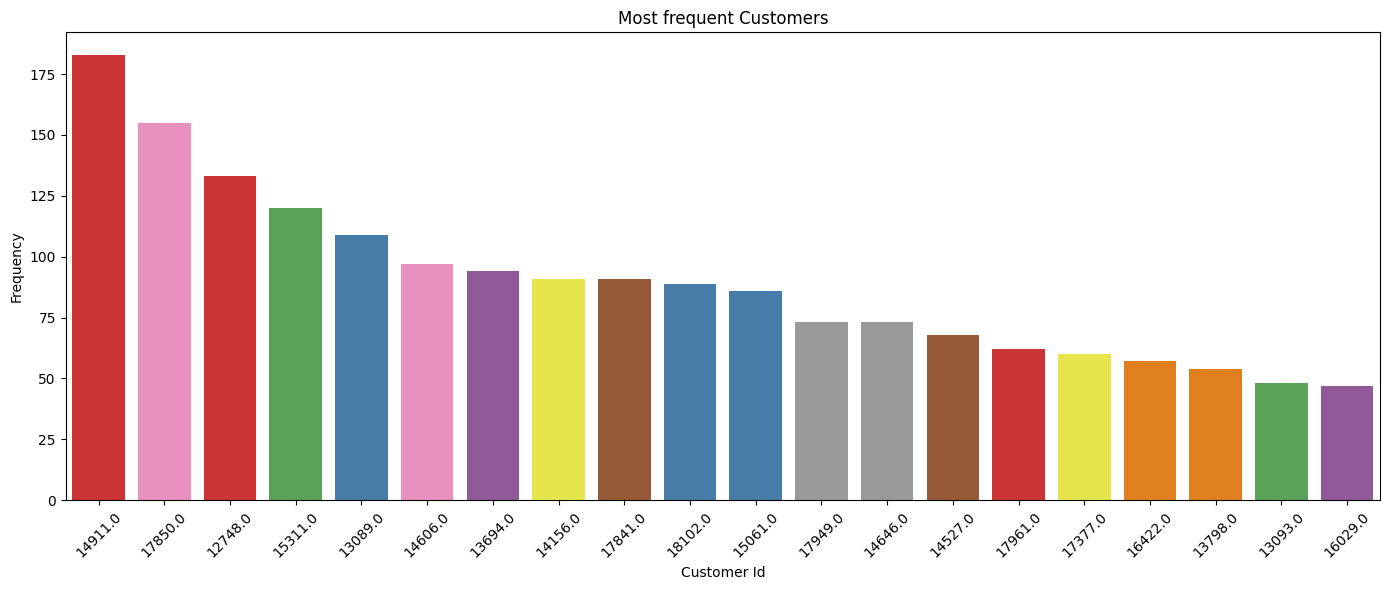

In [69]:
frequent=aggregated_df.sort_values(by='Frequency',ascending=False).head(20)
cus=frequent['Customer ID']

plt.figure(figsize=(14,6))
sns.barplot(data=frequent,x='Customer ID',y='Frequency',hue='Customer ID',palette='Set1',legend=False,order=cus)
plt.title('Most frequent Customers')
plt.xlabel('Customer Id')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [70]:
max_invoice_date=aggregated_df['lastinvoicedate'].max()
max_invoice_date

Timestamp('2010-12-09 20:01:00')

## Calculating Recency kitna time pehla customer na visit kia 

In [72]:
aggregated_df['Recency']=(max_invoice_date-aggregated_df['lastinvoicedate']).dt.days

In [73]:
aggregated_df.head(5)

,Customer ID,Monetoryvalue,Frequency,lastinvoicedate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


## Checking Outliers as outliers effect our analysis in k means 

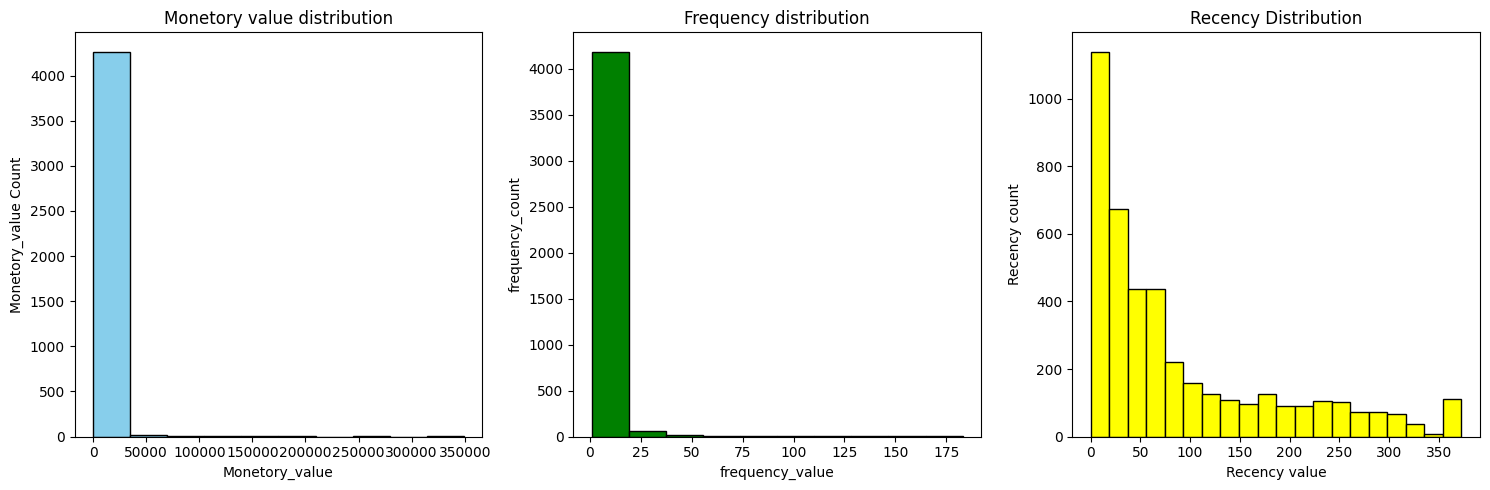

In [75]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(aggregated_df['Monetoryvalue'],bins=10,color='skyblue',edgecolor='black')
plt.title('Monetory value distribution')
plt.xlabel('Monetory_value')
plt.ylabel('Monetory_value Count')

plt.subplot(1,3,2)
plt.hist(aggregated_df['Frequency'],bins=10,color='green',edgecolor='black')
plt.title('Frequency distribution')
plt.xlabel('frequency_value')
plt.ylabel('frequency_count')

plt.subplot(1,3,3)
plt.hist(aggregated_df['Recency'],bins=20,color='yellow',edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency value')
plt.ylabel('Recency count')

plt.tight_layout()
plt.show()

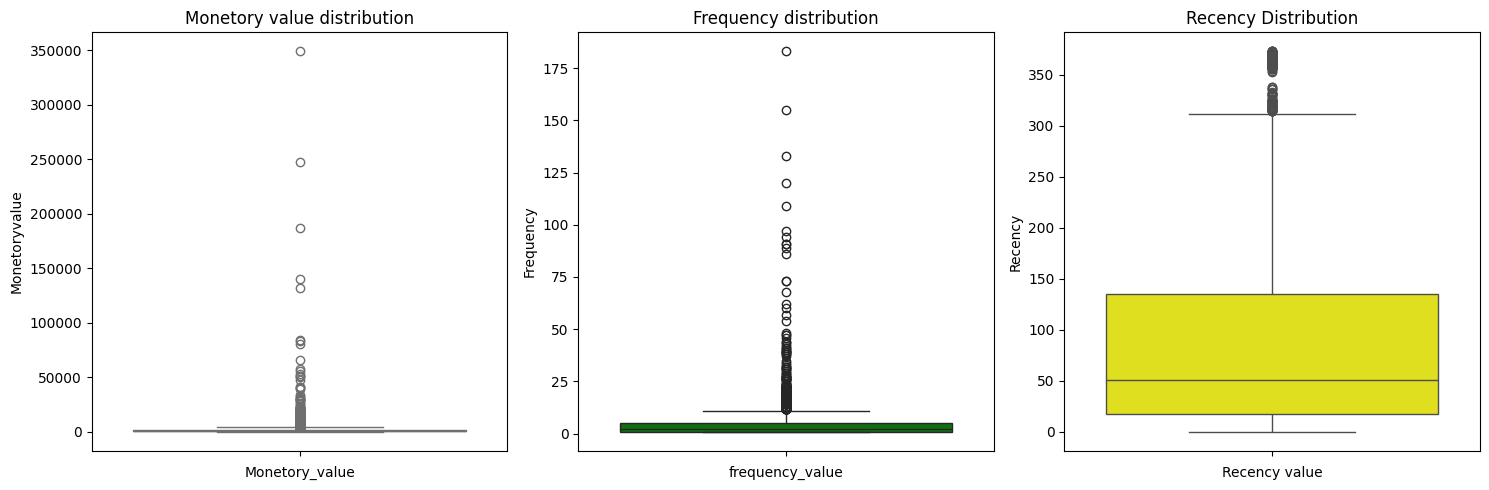

In [76]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(aggregated_df['Monetoryvalue'],color='skyblue')
plt.title('Monetory value distribution')
plt.xlabel('Monetory_value')

plt.subplot(1,3,2)
sns.boxplot(aggregated_df['Frequency'],color='green')
plt.title('Frequency distribution')
plt.xlabel('frequency_value')


plt.subplot(1,3,3)
sns.boxplot(aggregated_df['Recency'],color='yellow')
plt.title('Recency Distribution')
plt.xlabel('Recency value')


plt.tight_layout()
plt.show()

## Seprating the outlier

In [78]:
aggregated_df.head(1)

,Customer ID,Monetoryvalue,Frequency,lastinvoicedate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164


## Creating a sepraate data frame for outlier

In [80]:
mq1=aggregated_df['Monetoryvalue'].quantile(0.25)
mq3=aggregated_df['Monetoryvalue'].quantile(0.75)
m_iqr=mq3-mq1
monetory_outlier_df=aggregated_df[(aggregated_df['Monetoryvalue']>(mq3+1.5*m_iqr)) | (aggregated_df['Monetoryvalue']<(mq1-1.5*m_iqr)) ]  

In [81]:
monetory_outlier_df

,Customer ID,Monetoryvalue,Frequency,lastinvoicedate,Recency
9,12357.00,11229.99,1,2010-11-16 10:05:00,23
25,12380.00,4782.84,4,2010-08-31 14:54:00,100
42,12409.00,12346.62,4,2010-10-15 10:24:00,55
48,12415.00,19468.84,4,2010-11-29 15:07:00,10
61,12431.00,4145.52,11,2010-12-01 10:03:00,8
...,...,...,...,...,...
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41
4253,18251.00,21964.14,8,2010-09-20 13:26:00,80


In [82]:
monetory_outlier_df.describe()

,Customer ID,Monetoryvalue,Frequency,lastinvoicedate,Recency
count,423.00,423.00,423.00,423,423.00
mean,15103.04,12188.10,17.17,2010-11-09 12:26:02.978723328,30.04
min,12357.00,3802.04,1.00,2009-12-10 18:03:00,0.00
25%,13622.00,4605.94,8.00,2010-11-08 13:17:30,3.00
50%,14961.00,6191.32,12.00,2010-11-26 12:19:00,13.00
75%,16692.00,10273.24,18.00,2010-12-06 10:34:30,31.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,364.00
std,1728.66,25830.85,19.73,NaN,51.54


## Seprating frequency outlier dataset

In [84]:
Fq1 = aggregated_df['Frequency'].quantile(0.25)
Fq3 = aggregated_df['Frequency'].quantile(0.75)
f_iqr = Fq3 - Fq1

frequency_outlier_df = aggregated_df[
    (aggregated_df['Frequency'] > Fq3 + 1.5 * f_iqr) |
    (aggregated_df['Frequency'] < Fq1 - 1.5 * f_iqr)
]


In [85]:
frequency_outlier_df.describe()

,Customer ID,Monetoryvalue,Frequency,lastinvoicedate,Recency
count,279.00,279.00,279.00,279,279.00
mean,15352.66,14409.71,23.81,2010-11-23 11:06:20.645161216,16.09
min,12437.00,1094.39,12.00,2010-05-12 16:51:00,0.00
25%,13800.00,4331.56,13.00,2010-11-20 13:14:30,2.00
50%,15465.00,6615.77,17.00,2010-12-02 10:46:00,7.00
75%,16828.50,11692.41,23.00,2010-12-07 11:08:30,19.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,211.00
std,1748.43,31381.74,21.93,NaN,26.59


## Creating non outlier data

In [87]:
all_outlier_indexes = monetory_outlier_df.index.union(frequency_outlier_df.index)
non_outliers_df = aggregated_df[~aggregated_df.index.isin(all_outlier_indexes)]


In [88]:
non_outliers_df.describe()

,Customer ID,Monetoryvalue,Frequency,lastinvoicedate,Recency
count,3809.00,3809.00,3809.00,3809,3809.00
mean,15376.48,885.50,2.86,2010-09-03 11:16:46.516146176,97.08
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13912.00,279.91,1.00,2010-07-08 14:48:00,22.00
50%,15389.00,588.05,2.00,2010-10-12 16:25:00,58.00
75%,16854.00,1269.05,4.00,2010-11-17 13:14:00,154.00
max,18287.00,3788.21,11.00,2010-12-09 20:01:00,373.00
std,1693.20,817.67,2.24,NaN,98.11


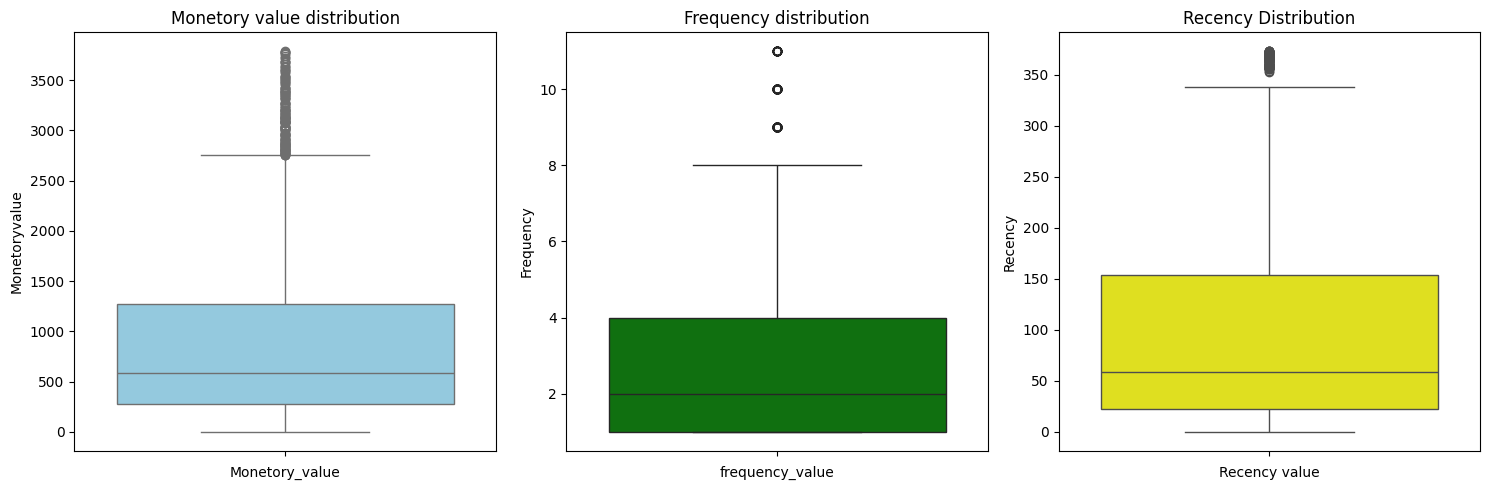

In [89]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(non_outliers_df['Monetoryvalue'],color='skyblue')
plt.title('Monetory value distribution')
plt.xlabel('Monetory_value')

plt.subplot(1,3,2)
sns.boxplot(non_outliers_df['Frequency'],color='green')
plt.title('Frequency distribution')
plt.xlabel('frequency_value')


plt.subplot(1,3,3)
sns.boxplot(non_outliers_df['Recency'],color='yellow')
plt.title('Recency Distribution')
plt.xlabel('Recency value')


plt.tight_layout()
plt.show()

## Plotting Scatter Plot of our features

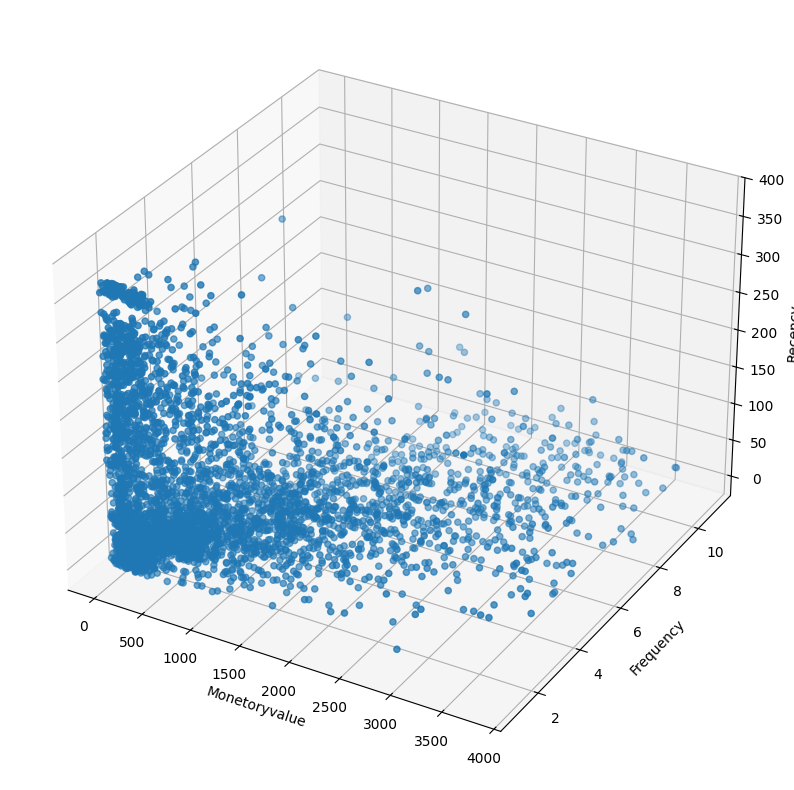

In [91]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(projection='3d')
scatter=ax.scatter(non_outliers_df['Monetoryvalue'],non_outliers_df['Frequency'],non_outliers_df['Recency'])
ax.set_xlabel('Monetoryvalue')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.show()

## Applying Scalingg

In [93]:
from sklearn.preprocessing import StandardScaler


In [94]:
scalar=StandardScaler()
scaled_data=scalar.fit_transform(non_outliers_df[['Monetoryvalue','Frequency','Recency']])
scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

In [95]:
scaled_data_df=pd.DataFrame(scaled_data,index=non_outliers_df.index,columns=('Monetoryvalue','Frequency','Recency'))
scaled_data_df

,Monetoryvalue,Frequency,Recency
0,-0.88,-0.38,0.68
1,0.54,-0.38,-0.97
2,-0.81,-0.83,-0.25
3,1.63,-0.38,-0.56
4,-0.72,-0.83,-0.89
...,...,...,...
4280,-0.30,1.40,-0.82
4281,-0.58,-0.83,-0.32
4282,-0.62,-0.83,2.02
4283,0.44,-0.38,0.14


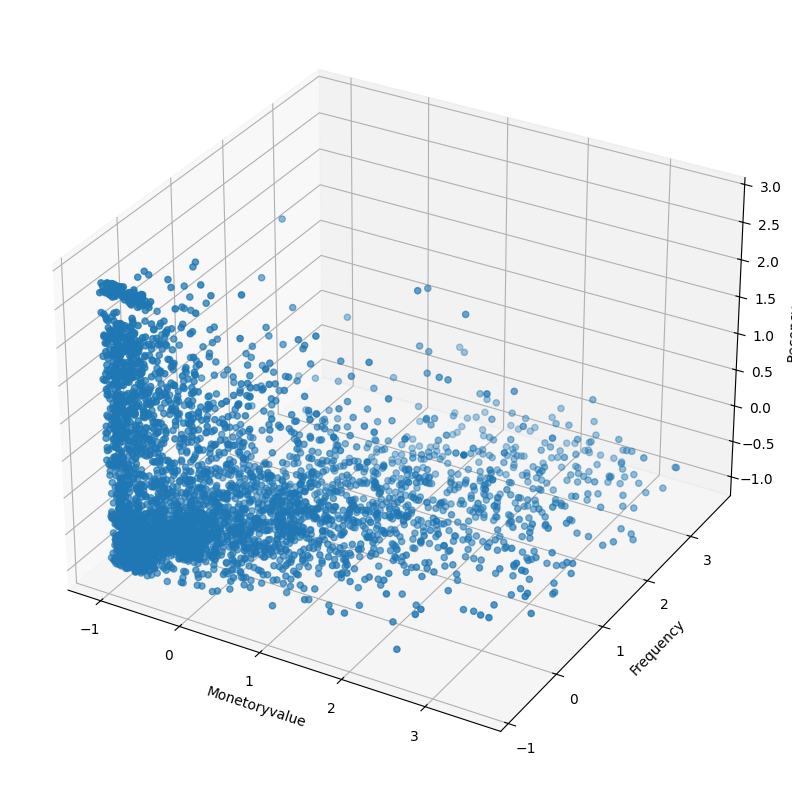

In [96]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(projection='3d')
scatter=ax.scatter(scaled_data_df['Monetoryvalue'],scaled_data_df['Frequency'],scaled_data_df['Recency'])
ax.set_xlabel('Monetoryvalue')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.show()

## Implementing K means

In [98]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

maxk=12
inertia=[]
sil_score=[]
k_values=range(2,maxk+1)

In [99]:
for k in k_values:
    kmean=KMeans(n_clusters=k,random_state=42,max_iter=1000)
    kmean.fit(scaled_data_df)
    sil=silhouette_score(scaled_data_df,kmean.labels_)
    sil_score.append(sil)
    inertia.append(kmean.inertia_)
   

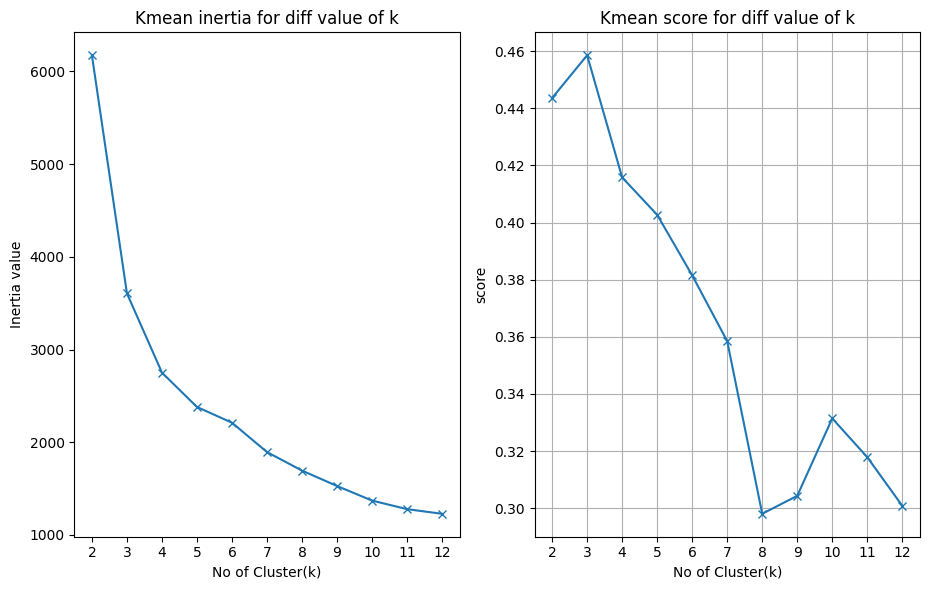

In [100]:
    plt.figure(figsize=(14,6))
    plt.subplot(1,3,1)
    plt.plot(k_values,inertia,marker='x')
    plt.title('Kmean inertia for diff value of k')
    plt.xlabel('No of Cluster(k)')
    plt.ylabel('Inertia value')
    plt.xticks(k_values)


    plt.subplot(1,3,2)
    plt.plot(k_values,sil_score,marker='x')
    plt.title('Kmean score for diff value of k')
    plt.xlabel('No of Cluster(k)')
    plt.ylabel('score')
    plt.xticks(k_values)

    plt.grid(True)
    plt.tight_layout()
    plt.show()


## we will use 4 cluster(elbow method)

In [102]:
kmean=KMeans(n_clusters=4,random_state=42,max_iter=1000)
cluster_labels=kmean.fit_predict(scaled_data_df)
cluster_labels

array([1, 0, 2, ..., 1, 0, 0])

In [103]:
non_outliers_df['clusterlabels']=cluster_labels

C:\Users\hamid\AppData\Local\Temp\ipykernel_6948\2354439582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df['clusterlabels']=cluster_labels


In [104]:
non_outliers_df

,Customer ID,Monetoryvalue,Frequency,lastinvoicedate,Recency,clusterlabels
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00,17,0
4281,18284.00,411.68,1,2010-10-04 11:33:00,66,2
4282,18285.00,377.00,1,2010-02-17 10:24:00,295,1
4283,18286.00,1246.43,2,2010-08-20 11:57:00,111,0


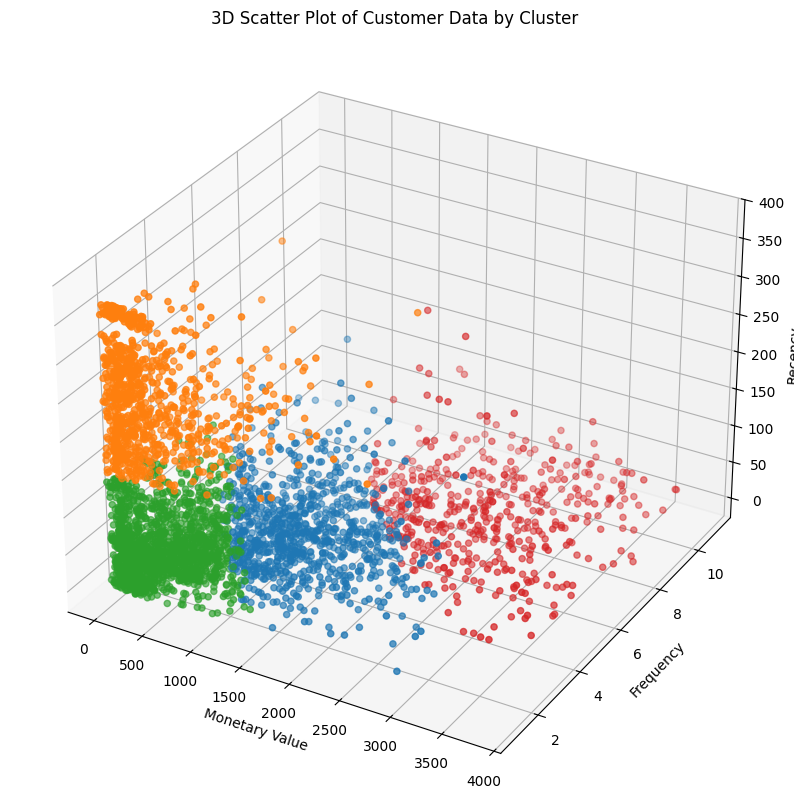

In [105]:
cluster_colors = {
    0: '#1f77b4',  # Blue
    1: '#ff7f0e',  # Orange
    2: '#2ca02c',  # Green
    3: '#d62728'   # Red
}

# Map cluster numbers to colors
colors = non_outliers_df['clusterlabels'].map(cluster_colors)

# Create 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

# 3D scatter plot
scatter = ax.scatter(
    non_outliers_df['Monetoryvalue'],
    non_outliers_df['Frequency'],
    non_outliers_df['Recency'],
    c=colors,
    marker='o'
)

# Axis labels
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

# Plot title
ax.set_title('3D Scatter Plot of Customer Data by Cluster')

# Show plot
plt.show()

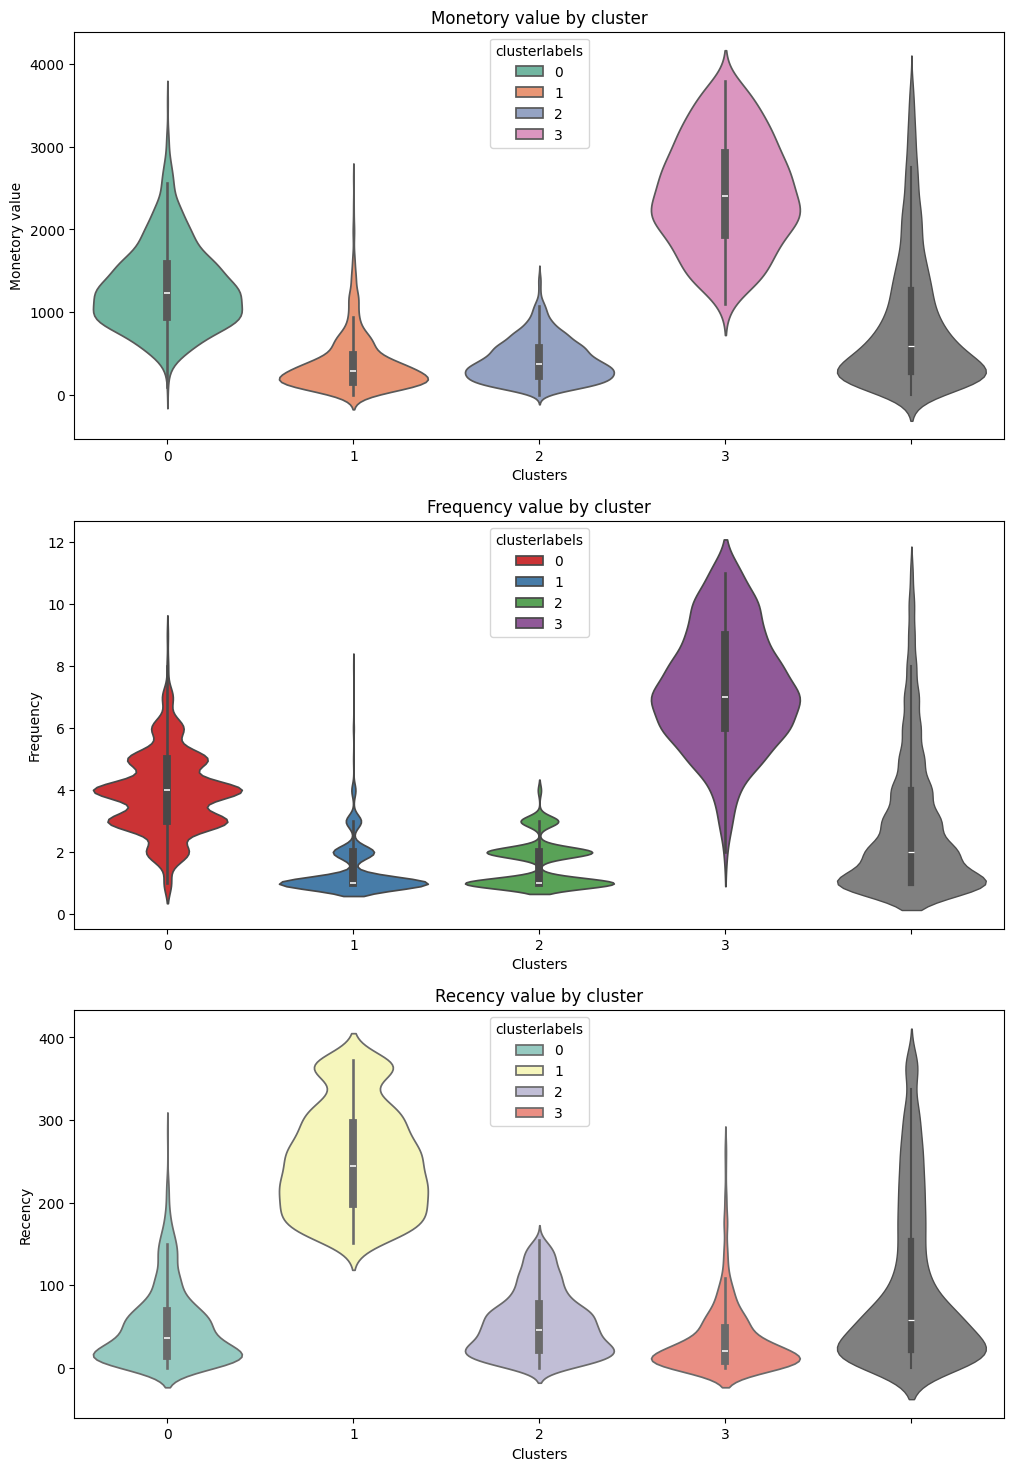

In [106]:
plt.figure(figsize=(12,18))

plt.subplot(3,1,1)
sns.violinplot(x='clusterlabels',y='Monetoryvalue',data=non_outliers_df,palette='Set2',hue='clusterlabels')
sns.violinplot(non_outliers_df['Monetoryvalue'],color='gray',linewidth=1.0)
plt.ylabel('Monetory value')
plt.xlabel('Clusters')
plt.title('Monetory value by cluster')

plt.subplot(3,1,2)
sns.violinplot(x='clusterlabels',y='Frequency',data=non_outliers_df,palette='Set1',hue='clusterlabels')
sns.violinplot(non_outliers_df['Frequency'],color='gray',linewidth=1.0)
plt.ylabel('Frequency')
plt.xlabel('Clusters')
plt.title('Frequency value by cluster')

plt.subplot(3,1,3)
sns.violinplot(x='clusterlabels',y='Recency',data=non_outliers_df,palette='Set3',hue='clusterlabels')
sns.violinplot(non_outliers_df['Recency'],color='gray',linewidth=1.0)
plt.ylabel('Recency')
plt.xlabel('Clusters')
plt.title('Recency value by cluster')
plt.show()

## Analysis

## Cluster 0
customers that spend moderatley and they are not as frequent but they are regular customers  
steps to take to increase their output  
needs to take steps to encourage them make more purchase maybe offering some discount   
upsell and cross sell  


## Cluseter 1 
Most Invaluable Customer:  
less visits  
also the frequency is low they rarely buy 
spend less  
What to do:   
email them offering discounts


## Cluster 2:
they spend low  
but products but ocassionally  
what to do  
small offers or discounts 

## Cluster 3  
Most valuable customer:  
MOST LOYAL CUSTOMER   
buys frequent ,spend most  
what to do:  
Vip program  
Loyalty rewards  

## NOW WE WILL DO Analysis for our outlier data

In [113]:
frequency_outlier_df.head()

,Customer ID,Monetoryvalue,Frequency,lastinvoicedate,Recency
65,12437.00,6834.99,20,2010-11-09 14:46:00,30
84,12471.00,17721.45,44,2010-11-30 14:35:00,9
85,12472.00,10426.48,13,2010-12-05 14:19:00,4
92,12482.00,21941.72,27,2010-05-12 16:51:00,211
115,12523.00,2330.38,12,2010-11-30 12:31:00,9


In [114]:
monetory_outlier_df.head()

,Customer ID,Monetoryvalue,Frequency,lastinvoicedate,Recency
9,12357.00,11229.99,1,2010-11-16 10:05:00,23
25,12380.00,4782.84,4,2010-08-31 14:54:00,100
42,12409.00,12346.62,4,2010-10-15 10:24:00,55
48,12415.00,19468.84,4,2010-11-29 15:07:00,10
61,12431.00,4145.52,11,2010-12-01 10:03:00,8


## finding common rows in both outliers df and merging them togeather to form one dataframe

In [116]:
common_index=monetory_outlier_df.index.intersection(frequency_outlier_df.index)
frequency_outlier_df.drop(common_index,inplace=True)
new_outlier_dataframe=pd.concat([monetory_outlier_df,frequency_outlier_df],axis=0)


C:\Users\hamid\AppData\Local\Temp\ipykernel_6948\1106283651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frequency_outlier_df.drop(common_index,inplace=True)


In [117]:
new_outlier_dataframe

,Customer ID,Monetoryvalue,Frequency,lastinvoicedate,Recency
9,12357.00,11229.99,1,2010-11-16 10:05:00,23
25,12380.00,4782.84,4,2010-08-31 14:54:00,100
42,12409.00,12346.62,4,2010-10-15 10:24:00,55
48,12415.00,19468.84,4,2010-11-29 15:07:00,10
61,12431.00,4145.52,11,2010-12-01 10:03:00,8
...,...,...,...,...,...
4056,17969.00,2141.74,18,2010-07-25 13:08:00,137
4059,17975.00,2540.02,12,2010-12-08 11:38:00,1
4129,18065.00,3453.80,14,2010-11-16 10:05:00,23
4161,18109.00,1840.99,13,2010-12-05 10:58:00,4


In [118]:
print(f"Mean of outliers (VIP CUSTOMERS) Spending : {new_outlier_dataframe['Monetoryvalue'].mean()} frequency mean {new_outlier_dataframe['Frequency'].mean()}")
print(f"Monetory value mean of non outlier : {non_outliers_df['Monetoryvalue'].mean()} frequency avg: {non_outliers_df['Frequency'].mean()}")

Mean of outliers (VIP CUSTOMERS) Spending : 11135.515705882353 frequency mean 16.930672268907564
Monetory value mean of non outlier : 885.5021969020739 frequency avg: 2.863481228668942


## AS we can conclude from this data that outlier pdf contain our vvip customers who spend more and visits more frequently

In [120]:
new_outlier_dataframe['Cluster']='VIP Customers'

In [121]:
new_outlier_dataframe

,Customer ID,Monetoryvalue,Frequency,lastinvoicedate,Recency,Cluster
9,12357.00,11229.99,1,2010-11-16 10:05:00,23,VIP Customers
25,12380.00,4782.84,4,2010-08-31 14:54:00,100,VIP Customers
42,12409.00,12346.62,4,2010-10-15 10:24:00,55,VIP Customers
48,12415.00,19468.84,4,2010-11-29 15:07:00,10,VIP Customers
61,12431.00,4145.52,11,2010-12-01 10:03:00,8,VIP Customers
...,...,...,...,...,...,...
4056,17969.00,2141.74,18,2010-07-25 13:08:00,137,VIP Customers
4059,17975.00,2540.02,12,2010-12-08 11:38:00,1,VIP Customers
4129,18065.00,3453.80,14,2010-11-16 10:05:00,23,VIP Customers
4161,18109.00,1840.99,13,2010-12-05 10:58:00,4,VIP Customers


In [122]:
non_outliers_df['clusterlabels'].value_counts()

clusterlabels
2    1499
0     914
1     902
3     494
Name: count, dtype: int64

In [123]:
new_outlier_dataframe.head()

,Customer ID,Monetoryvalue,Frequency,lastinvoicedate,Recency,Cluster
9,12357.00,11229.99,1,2010-11-16 10:05:00,23,VIP Customers
25,12380.00,4782.84,4,2010-08-31 14:54:00,100,VIP Customers
42,12409.00,12346.62,4,2010-10-15 10:24:00,55,VIP Customers
48,12415.00,19468.84,4,2010-11-29 15:07:00,10,VIP Customers
61,12431.00,4145.52,11,2010-12-01 10:03:00,8,VIP Customers


In [124]:
non_outliers_df.head()

,Customer ID,Monetoryvalue,Frequency,lastinvoicedate,Recency,clusterlabels
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2


In [125]:
new_outlier_dataframe.rename(columns={'Cluster':'clusterlabels'},inplace=True)

In [126]:
Final_Analysis=pd.concat([non_outliers_df,new_outlier_dataframe],axis=0)

In [127]:
Final_Analysis.head()

,Customer ID,Monetoryvalue,Frequency,lastinvoicedate,Recency,clusterlabels
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2


In [128]:
Final_Analysis['clusterlabels'] = Final_Analysis['clusterlabels'].apply(
    lambda x: 'Moderate regular customer' if x == 0 else
              'Most Invaluable Customer' if x == 1 else
              'Occasional low spender' if x == 2 else
              'Valuable loyal customer' if x == 3 else
              'Top VIP Customer'
)


## Final Conclusions

In [130]:
Final_Analysis.head()

,Customer ID,Monetoryvalue,Frequency,lastinvoicedate,Recency,clusterlabels
0,12346.00,169.36,2,2010-06-28 13:53:00,164,Most Invaluable Customer
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,Moderate regular customer
2,12348.00,221.16,1,2010-09-27 14:59:00,73,Occasional low spender
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,Moderate regular customer
4,12351.00,300.93,1,2010-11-29 15:23:00,10,Occasional low spender


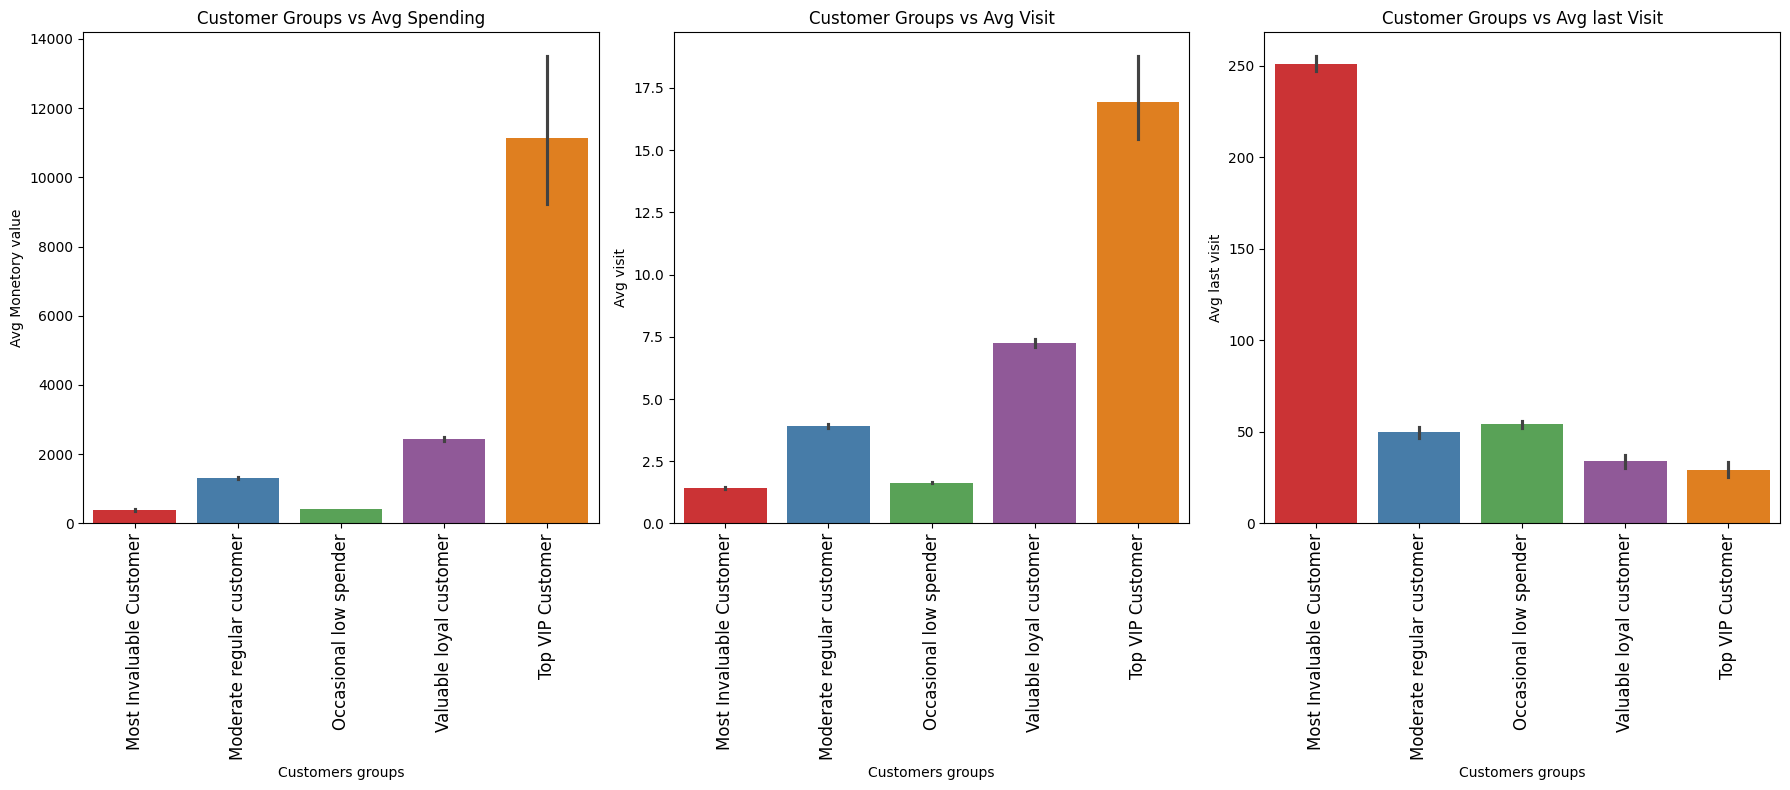

In [131]:
plt.figure(figsize=(18,8))

plt.subplot(1,3,1)
sns.barplot(data=Final_Analysis,x='clusterlabels',y='Monetoryvalue',hue='clusterlabels',palette='Set1',legend=False)
plt.title('Customer Groups vs Avg Spending')
plt.xlabel('Customers groups')
plt.ylabel('Avg Monetory value')
plt.xticks(rotation='vertical',fontsize=12,color='black')

plt.subplot(1,3,2)
sns.barplot(data=Final_Analysis,x='clusterlabels',y='Frequency',hue='clusterlabels',palette='Set1',legend=False)
plt.title('Customer Groups vs Avg Visit')
plt.xlabel('Customers groups')
plt.ylabel('Avg visit')
plt.xticks(rotation='vertical',fontsize=12,color='black')

plt.subplot(1,3,3)
sns.barplot(data=Final_Analysis,x='clusterlabels',y='Recency',hue='clusterlabels',palette='Set1',legend=False)
plt.title('Customer Groups vs Avg last Visit')
plt.xlabel('Customers groups')
plt.ylabel('Avg last visit')
plt.xticks(rotation='vertical',fontsize=12,color='black')
plt.tight_layout()
plt.show()

## Percentage of customers in each group

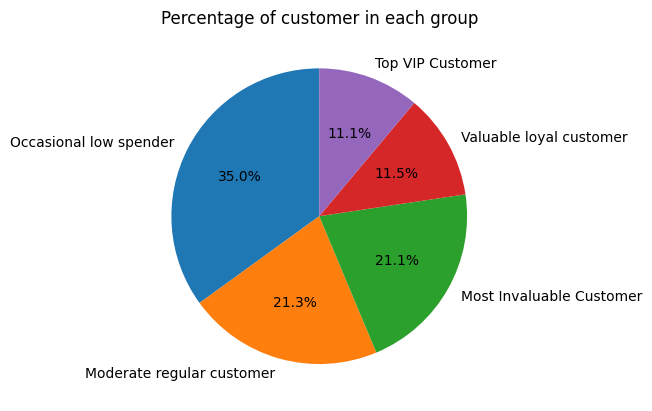

In [134]:
customer_count=Final_Analysis['clusterlabels'].value_counts()
plt.pie(customer_count,labels=customer_count.index,autopct='%1.1f%%',startangle=90)
plt.title('Percentage of customer in each group')
plt.show()


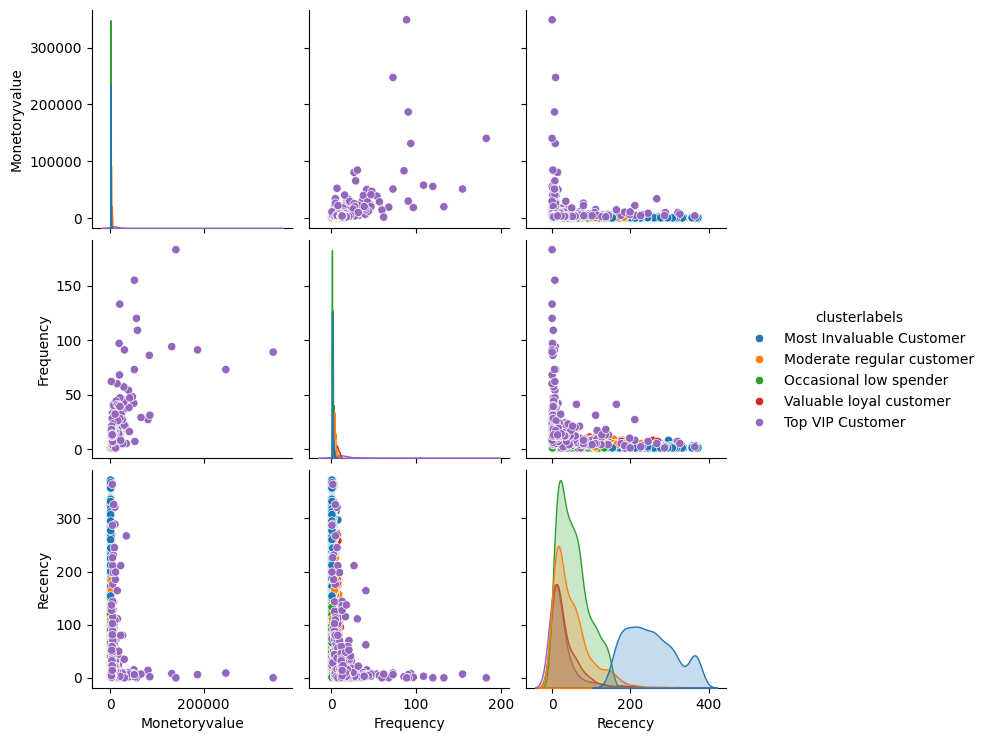

In [136]:
sns.pairplot(Final_Analysis, hue='clusterlabels', vars=['Monetoryvalue', 'Frequency', 'Recency'])
plt.show()
